In [8]:
#!/usr/bin/python 

# Script for the Kaggle Titanic Competition 
# based on the DataCamp course: 
#   https://campus.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning/predicting-with-decision-trees?ex=6


In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

import seaborn as sns

sns.set(color_codes=True)

In [10]:
# Load the train and test datasets to create two DataFrames
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Print the `shape` of the train and test dataframes
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
714


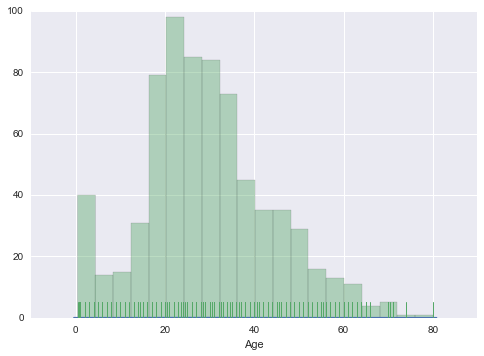

In [11]:
# initial data exploration

print(train.describe())

# number of Age points on the Train set 
print(len(train.Age.dropna()))

sns.distplot(train.Age.dropna())
sns.distplot(train.Age.dropna(), kde=False, rug=True);

In [12]:
# does gender play a role?

# absolute numbers of survivors 
train["Survived"].value_counts()

# normalised survival rates
print(train["Survived"].value_counts(normalize = True))

# normalised survival rates by gender 
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True))
print(train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64
0    0.811092
1    0.188908
Name: Survived, dtype: float64
1    0.742038
0    0.257962
Name: Survived, dtype: float64


In [13]:
# does age play a role?

# Create the column Child and assign to 'NaN'
train["Child"] = float('NaN')

# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
train["Child"][train["Age"] < 18] = 1
train["Child"][train["Age"] >= 18] = 0

# normalized Survival Rates for passengers under 18
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

# normalized Survival Rates for passengers 18 or older
test_one = testprint(train["Survived"][train["Child"] == 0].value_counts(normalize = True))

1    0.539823
0    0.460177
Name: Survived, dtype: float64


/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'testprint' is not defined

In [14]:
# Create a copy of test: test_one
test_one = test

# Initialize a Survived column to 0
test_one["Survived"] = 0
test_one.describe()

# Set Survived to 1 if Sex equals "female" and print the `Survived` column from `test_one`
test_one["Survived"][test_one["Sex"] == "female"] = 1

# write csv with results 
#   after submission: ~76% 
test_one[['PassengerId', 'Survived']].to_csv("initial.csv")

/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
# Using sklearn decision trees

#   convert categorical to numerical 
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# embarked        Port of Embarkation
#                (C = Cherbourg; Q = Queenstown; S = Southampton)
#Impute the Embarked variable
# we assume Southampton for the missing values
train["Embarked"] = train["Embarked"].fillna("S")

#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

#Print the Sex and Embarked columns
print(train['Sex'])
print(train['Embarked'])

# Imputting Age
train["Age"] = train["Age"].fillna(train["Age"].median())

/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipyker

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, dtype: object
0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877

In [16]:
feat_list = ["Pclass", "Sex", "Age", "Fare"] 

# Create the target and features numpy arrays: target, features_one
target = train["Survived"].values
features_one = train[feat_list].values

print(target.shape)
print(features_one.shape)

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

# Look at the importance and score of the included features
feat_importances = my_tree_one.feature_importances_
print(feat_importances)
print(my_tree_one.score(features_one, target))

#  variable plays the most important role in determining whether or not a passenger survived
print("Most important role determining target: {}".format(feat_list[feat_importances.argmax(axis=0)]))


(891,)
(891, 4)
[ 0.11980215  0.31274009  0.23414782  0.33330994]
0.977553310887
Most important role determining target: Fare


In [17]:
### Test DataSet
test_two = test 

#   convert categorical to numerical 
# Convert the male and female groups to integer form
test_two["Sex"][test_two["Sex"] == "male"] = 0
test_two["Sex"][test_two["Sex"] == "female"] = 1

# imputting Fare with median 
test_two.Fare = test_two.Fare.fillna(test_two.Fare.median()) 

# Imputting Age
test_two["Age"] = test_two["Age"].fillna(test_two["Age"].median())

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test_two[ ["Pclass", "Sex", "Age", "Fare"] ].values

# prediction using the test set
my_prediction = my_tree_one.predict(test_features)

# data frame with two columns: PassengerId & Survived
PassengerId =np.array(test_two["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

# should have 418 entries
print(my_solution.shape)

# output file. Score ~72%
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])


(418, 1)


/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
# Creating a more generic tree 

# Create a new array with the added features: features_two
flist_two = ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]
features_two = train[flist_two].values

# Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)

my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two, target))

# Look at the importance and score of the included features
feat_importances = my_tree_two.feature_importances_
print(feat_importances)
print("Most important feature: {}".format(flist_two[feat_importances.argmax(axis=0)]))


0.905723905724
[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
Most important feature: Sex


In [19]:
# Applying new tree to test set

test3 = test_two

#Convert the Embarked classes to integer form
test3["Embarked"][test3["Embarked"] == "S"] = 0
test3["Embarked"][test3["Embarked"] == "C"] = 1
test3["Embarked"][test3["Embarked"] == "Q"] = 2

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test3[flist_two].values

# prediction using the test set
prediction3 = my_tree_two.predict(test_features)

# data frame with two columns: PassengerId & Survived
PassengerId = np.array(test3["PassengerId"]).astype(int)
solution3 = pd.DataFrame(prediction3, PassengerId, columns = ["Survived"])

# should have 418 entries
print(solution3.shape)

# output file. Score ~76.1%
solution3.to_csv("solution3.csv", index_label = ["PassengerId"])


(418, 1)


/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/luisf/virtual-envs/expedia_kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
## Adding a Familiy size column 

# Create train_two with the newly defined feature
train_two = train.copy()
train_two["family_size"] = train_two.Parch + train_two.SibSp + 1 

flist = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]

# Create a new feature set and add the new feature
features_three = train_two[flist].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

#Print the score of the new decison tree
print(my_tree_three.score(features_three, target))

# Look at the importance and score of the included features
feat_importances = my_tree_three.feature_importances_
print(feat_importances)
print("Most important feature: {}".format(flist[feat_importances.argmax(axis=0)]))

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))


0.979797979798
[ 0.11264598  0.31088095  0.20992378  0.27233968  0.00571693  0.02862802
  0.05986466]
Most important feature: Sex
0.979797979798


In [22]:
# Applying new tree to test set

test3 = test3
test3["family_size"] = test3.Parch + test3.SibSp + 1 

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test3[flist].values

# prediction using the test set
prediction3 = my_tree_three.predict(test_features)

# data frame with two columns: PassengerId & Survived
PassengerId = np.array(test3["PassengerId"]).astype(int)
solution3 = pd.DataFrame(prediction3, PassengerId, columns = ["Survived"])

# should have 418 entries
print(solution3.shape)

# output file. Score ~66.5%
solution3.to_csv("solution3_familysize.csv", index_label = ["PassengerId"])


(418, 1)
